# CISC 520 -- Executive Session 1

In this session, we discussed some basic Python coding and a few of the libraries that we will be using throughout the course. Specifically, we discussed numpy, which provides a Python interface to FORTRAN and C libraries for rapid numerical processing, as well as access to arrays. We also discussed matplotlib and how to use it to create a few common types of plot.

First, we'll use numpy to import some data from a file.

In [1]:
# import the numpy module, and assign it the name "np".
import numpy as np

# Define the name of the file to be opened. Note that this is a "relative" path to the file, and thus will only work
# if the file exists in the same folder as the ipython notebook. Otherwise, you will need to specify the absolute path 
# to the file.
source_file = "./voltage_3.csv"

# the genfromtxt function opens a CSV file and returned a 2D numpy array of its contents.
data = np.genfromtxt(source_file, dtype='float32', delimiter=',', skip_header=1)

In [3]:
# The variable "data" contains a 2D array of values from the CSV file. As such, you can reference a single value like so,
print("1:\t{}".format(data[1,2]))

# or a column of data
print("2:\t{}".format(data[:,5]))

# or a row of data
print("3:\t{}".format(data[5,:]))

# NB: Python starts array indices at 0, rather than 1 (like R or MatLab). So, if you are more familiar with one of those
# languages, keep an eye out. The first cell in the CSV file is,
print("4:\t{}".format(data[0,0]))

1:	0.5012571811676025
2:	[-5.078383  -5.0828547 -5.0895634 ... -5.0652857 -5.067841  -5.0697575]
3:	[ 5.0020218e-03  7.1938820e+00  5.0157672e-01 -6.2184176e+00
 -1.4782881e+00 -5.1020217e+00  5.8765596e-01  3.0806065e-02]
4:	0.0


In [4]:
# Using numpy, we can calculate some basic summary statistics from the contents of these arrays. 
# For example, the mean of a column can be had,
mean_1 = np.average(data[:,1])

# as well as the standard deviation
std_1 = np.std(data[:,1])

In [5]:
# Of course, our data file has many columns. So let's calculate summary statistics for all of them
# We will accomplish this task by looping over the data and storing the mean and std for each column
# in an array.

# First, we'll create the arrays.
means = np.empty(8, 'float32')
stds = np.empty(8, 'float32')

# And now we'll use a for loop to calculate each mean and standard deviation.
for i in range(8):
    means[i] = np.average(data[:,i])
    stds[i] = np.std(data[:,i])

In [6]:
print(means)
print(stds)

[ 2.4999983e+00  7.1212912e+00  4.9389374e-01 -6.1670446e+00
 -1.4728587e+00 -5.0834913e+00  5.7561815e-01 -1.8612543e-04]
[1.4436631  0.10111903 0.0111918  0.09933801 0.00725664 0.01429465
 0.01186404 0.01855633]


In [7]:
# Let's reduce our dataset by dropping the first and last column.
# We can do this easily by using array slicing, like so:
reduced_data = data[:,1:7]

# NB: the 7 at the tail end of the slice is not the last index to include. This dataset will contain
# the data in column 1 of "data", up to but not including column 7. So the next effect is that
# "reduced_data" will only have 6 columns.

In [8]:
# Next, we'll normalize the data. We'll talk more about this in a future lecture.
# The important take-away here is that you can perform scalar operations upon
# a numpy array in bulk with one line. This line has the effect of dividing every
# element in "reduced_data" by 10.
normalized_data = (reduced_data) / 10

# We'll then recalculate the mean and standard deviation. Note that, in this case, the approach of recalculating
# all of the results:
norm_means = np.empty(6, 'float32')
norm_stds = np.empty(6, 'float32')

for i in range(6):
    norm_means[i] = np.average(normalized_data[:,i])
    norm_stds[i] = np.std(normalized_data[:,i])
    
print(norm_means)
print(norm_stds)
    

[ 0.7121292   0.04938938 -0.61670446 -0.14728588 -0.5083491   0.05756181]
[0.0101119  0.00111918 0.0099338  0.00072566 0.00142947 0.0011864 ]


In [9]:
# And simply normalizing the already calculated statistics for the relevant columns

norm_means2 = means[1:7] / 10
norm_std2 = stds[1:7] / 10

print(norm_means2)
print(norm_std2)

[ 0.7121291   0.04938937 -0.61670446 -0.14728586 -0.5083491   0.05756181]
[0.0101119  0.00111918 0.0099338  0.00072566 0.00142947 0.0011864 ]


In [10]:
# Gives the exact same result.

In [11]:
# Now, we'll demonstrate plotting data. To do this, we'll import
# matplotlib using the following statement.
from matplotlib import pyplot as plt


# We dropped time from our dataset, so let's create an array
# containing time in millseconds (otherwise known, in this case,
# as the array indices) to use as our independent variable.
time = list(range(len(normalized_data[:,0])))

# To create a scatter plot of the data in column 0, 
# call plt.scatter(), setup title and axes, and then
# use plt.show() to display the result.
plt.scatter(time, normalized_data[:,0], marker='x')
plt.title('Voltage vs. Time, Strain Gauge 0')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.show()

<Figure size 640x480 with 1 Axes>

C:\Users\Rodda Ouma\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodda Ouma\Anaconda4\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


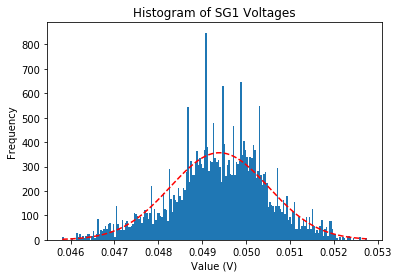

In [12]:
# Here is the code to create a histogram of the data, using matplotlib.

import matplotlib.mlab as mlab
import scipy.stats as stats

# A parameter to define which column is plotted. Change this to update what 
# histogram is generated.
column = 1

# Create the histogram. In this case, we use 200 bins and normalize
# the results. Typically, you want to normalize (normed=1) to ensure
# the appropriate scale.
n, bins, patches = plt.hist(normalized_data[:,column], 200, normed=1)

# We can also overlay a line graph of the expected normal distribution
# over our histogram.

# Create an array of the values of the normal dist with the appropriate
# mean and standard deviation.
expected = mlab.normpdf(bins, norm_means[column], norm_stds[column])

# Plot the distribution as a red, dashed line.
plt.plot(bins, expected, 'r--')

# Format axes and title, and display the plot.
plt.title("Histogram of SG1 Voltages")
plt.xlabel("Value (V)")
plt.ylabel("Frequency")
plt.show()

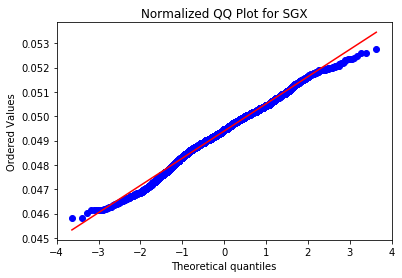

In [13]:
# This is the code to create a normal Q-Q plot. This is a technique that you
# can use to determine how well matched two distributions are. In this case, 
# we plot the quantiles of one of our columns against its associated normal
# distribution.

# Play around with which column is plotted (change the column variable in the cell above 
# this one) and compare histograms with Q-Q plots.
stats.probplot(normalized_data[:,column], dist="norm", plot=plt)
plt.title("Normalized QQ Plot for SGX")
plt.show()

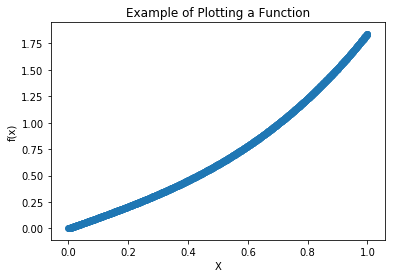

In [14]:
# If you want to create evenly space values between two numbers,
# a process very common when plotting functions, you can use the
# linspace function. This will return an array containing numbers 
# that run from the first argument to the second. The third argument
# specifies the number of evenly spaced values to include between the 
# first and second.
vals = np.linspace(0, 1, 1000)

# Define a function to plot
def f(x):
    return x**3 + np.sin(x)

# Evaluate the function at each value output by linspace, 
# and plot the two arrays against each other.
plt.scatter(vals, f(vals))
plt.title('Example of Plotting a Function')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.show()